### Fill out:
Name & Surname: Chow Chun Kei

Student ID: 33520771

## W1&W2 post studio exercises (revision, kNN)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to answer the questions stated in the exercises in markdown cell. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

For these exercises you will use the `penguins` dataset from seaborn. Load it using load_dataset().

In [37]:
# as there were warnings about future changes so far non-affecteing our calculations - we'll import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Exercise 1 (cleaning, plotting)

First, create a numerical code for classification rather than using the string value of `species` (add column named, e.g., `code`). 

We will be using columns `flipper length`, `bill depth`, `species`, `code`; drop rows that have at least one missing value in any of these columns. Hint: dropna() and play around with its parameters such as subset etc.

Next, create:

- a feature array which consists of the `flipper length` and `bill depth` (**show first 5 rows**), 

- a target (i.e., Y or outcome) series which consists of the species `code` (**show first 5 values**),

- and an array which contains unique values of species names (**show all**). 

Also, **plot a scatter plot** of the feature array against the target series (include legend). Hint: Plot flipper length against bill depth and colour according to `target series` - label will have 3 levels: 0,1,2. If you would like scatterplot with species names - use penguins column `species`.)

In [38]:
# import all the modules needed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# load the dataset from seaborn
penguins = sns.load_dataset('penguins')

# drop missing values
penguins.dropna(inplace=True)

# check if all the missing values is dropped
print(penguins.isnull().sum())

# create a target where species is categorise as code
penguins['code'] = penguins.species.astype('category').cat.codes 

# show the first 5 rows and columns
penguins.head()



species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0


In [40]:
# Create and show feature array with bill depth and flipper length
X = penguins[['bill_depth_mm','flipper_length_mm']]
X.sample(5)

,bill_depth_mm,flipper_length_mm
94,17.3,187.0
308,14.0,212.0
254,14.8,220.0
304,13.8,212.0
242,14.5,213.0


In [41]:
# create target series consits of species code
Y = penguins[['code']]
Y.sample(5)

,code
163,1
112,0
132,0
320,2
170,1


In [60]:
# show array with all unique species name
unique_species= penguins['species'].unique()
unique_species

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

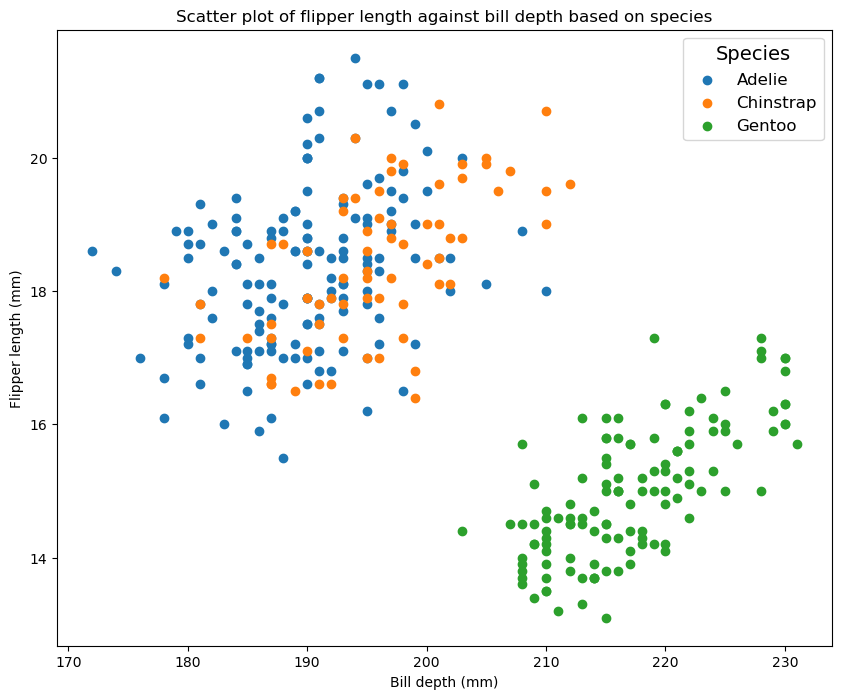

In [91]:
# Plotting scatter plot
plt.figure(figsize=(10, 8))
for i, j in enumerate(unique_species):
    species_data = X[Y == i]
    plt.scatter(species_data['flipper_length_mm'], species_data['bill_depth_mm'], label=j)

# Add legend
plt.legend(title='Species', fontsize=12, title_fontsize=14)

# Add title, x and y label
plt.title('Scatter plot of flipper length against bill depth based on species')
plt.xlabel('Bill depth (mm)')
plt.ylabel('Flipper length (mm)')
plt.show()


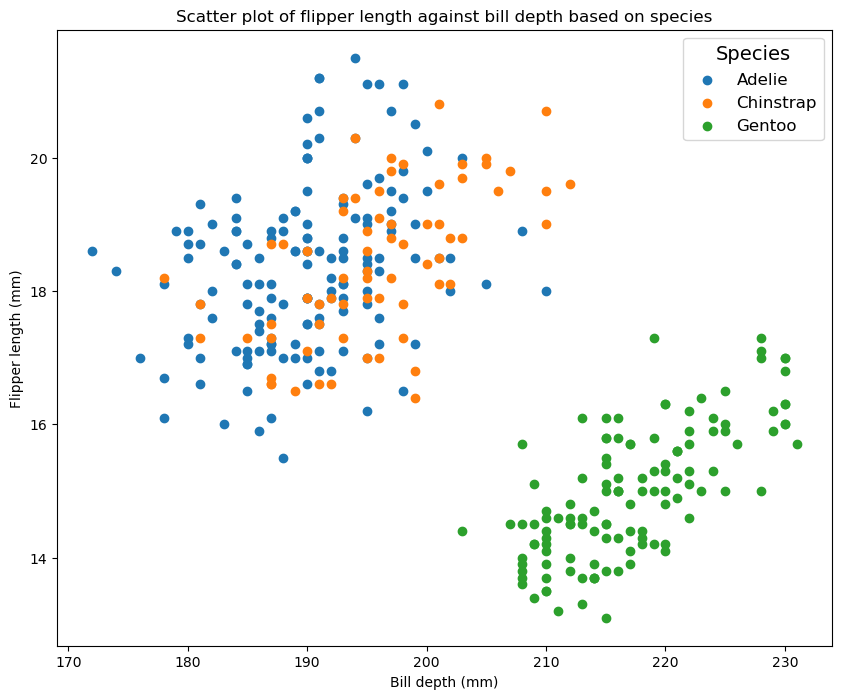

In [84]:
# Plotting scatter bar
# Create a colormap and a legend handle for each species
# Plotting scatter plot
plt.figure(figsize=(10, 8))
for i, species in enumerate(unique_species):
    species_data = X[Y == i]
    plt.scatter(species_data['flipper_length_mm'], species_data['bill_depth_mm'],label=species)

# Add legend
plt.legend(title='Species', fontsize=12, title_fontsize=14)

# Add title, x and y label
plt.title('Scatter plot of flipper length against bill depth based on species')
plt.xlabel('Bill depth (mm)')
plt.ylabel('Flipper length (mm)')
plt.show()


### Exercise 2 (kNN - raw data)

Split the data into training and testing set, with and 80:20 split, random state equal to 0. Create a kNN model with 10 nearest neighbours and uniform weights. Train (fit) model on training data. Calculate predictions for feature values in testing set (**show first 5 entries**). **Print accuracy** (import from sklearn.metrics) and **plot confusion matrix** using function from the pre-studio notebook.

### Exercise 3 (normalisation, plotting)

Our features have quite different variance. Let's see, whether accuracy of kNN model can improve by normalising the the feature array. Divide data in feature array by its standard deviation, **show first 5 rows** and **plot scatterplot of flipper length against bill_depth coloured according to code (or species).**

### Exercise 4 (kNN - normalised data)

Repeat Ex 2 on normalised data created in Ex 3. **Show accuracy score, plot confusion matrix. Did the accuracy score improve?**